## calculate b-value and Mc of detected catalog

1. Transform the catalog to the required format
 columns are also required: `longitude`, `latitude`, `depth`, `time`, and `magnitude` 

2. import the package and read my catalog

In [ ]:
import pandas as pd
import numpy as np
from seismostats import Catalog







data = pd.read_csv(
    '/Users/chouyuhin/Desktop/standard_catalog_QJ_alltime.csv',
    sep=',',
    usecols=['year', 'month', 'day', 'hour', 'minute', 'second','latitude', 'longitude','depth', 'mag_type', 'magnitude']
    # delim_whitespace=True,
    # usecols=['lat', 'lon', 'depth', 'year', 'month', 'day', 'hour', 'minute', 'second', 'magnitude']
)

data['time'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])
data = data[data['time']>='2020-01-01 00:00:00']
data = data[data['time']<='2022-10-10 23:59:59']
# print(data['time']) 
data = data.rename(columns={'lat': 'latitude', 'lon': 'longitude'})
data = data[['longitude', 'latitude', 'depth', 'time', 'magnitude']]
data = data[data['longitude']>=102.5]
# data = data.head(61)  # Limit to first 50 entries for testing
cat = Catalog(data)

cat

,longitude,latitude,depth,time,magnitude
9059,102.765,26.862,6,2020-01-02 05:25:29.360,1.6
9060,102.814,26.957,11,2020-01-13 12:09:13.050,2.1
9061,102.788,27.011,20,2020-01-14 16:48:16.830,1.4
9064,103.270,26.411,6,2020-01-17 11:28:40.140,1.6
9065,102.987,27.191,6,2020-01-17 18:57:27.880,2.1
...,...,...,...,...,...
12806,102.898,26.988,10,2022-10-25 17:36:58.810,1.5
12807,103.036,26.695,21,2022-10-26 22:32:23.340,1.4
12808,102.807,27.281,14,2022-10-27 03:44:11.860,1.3
12809,102.899,27.025,10,2022-10-29 02:18:02.660,1.0


Basic spatial plot

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

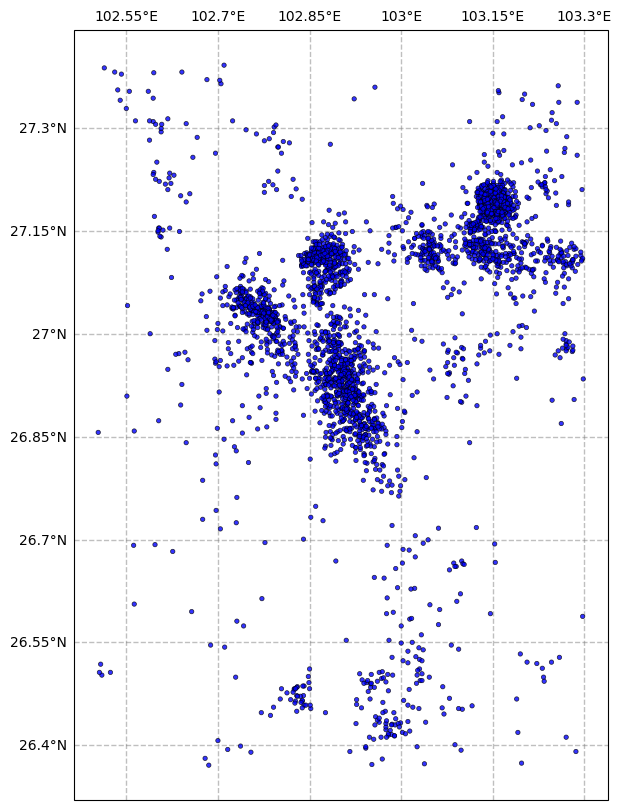

In [38]:
fig = plt.figure(figsize=(10, 10), linewidth=1)    
ax = cat.plot_in_space(
    dot_smallest=0.1,
    dot_largest=10,
    dot_interpolation_power=0,
    dot_labels=False)

plt.show()

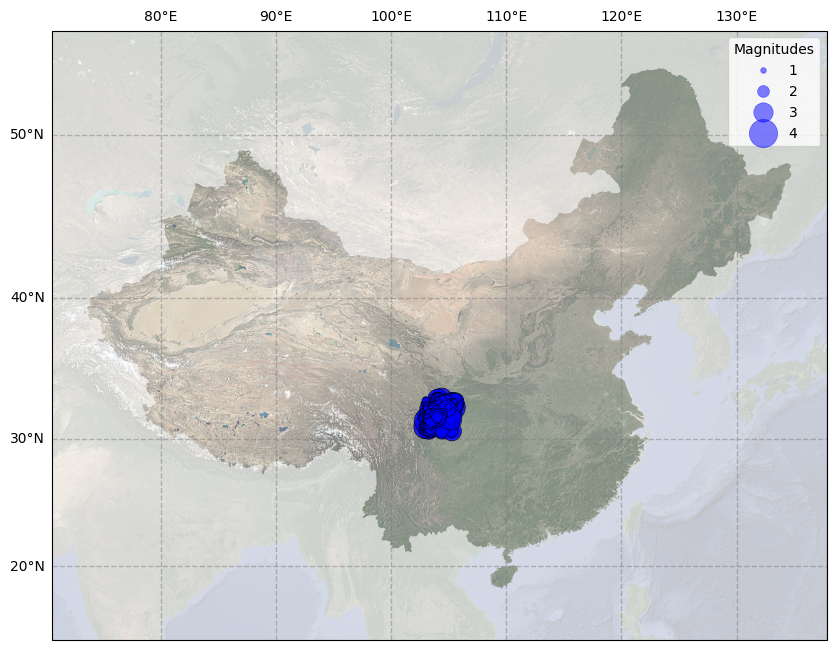

In [75]:
fig = plt.figure(figsize=(10, 10), linewidth=1)    
ax = cat.plot_in_space(
    resolution='10m',
    include_map=True, # adds a map in the background
    country='China', # zooms in on Switzerland and greys out the rest of the map
    dot_smallest=1,
    dot_largest=500,
    dot_interpolation_power=3,
    dot_labels=[1,2,3,4]) # specifies the color of the dots

plt.show()

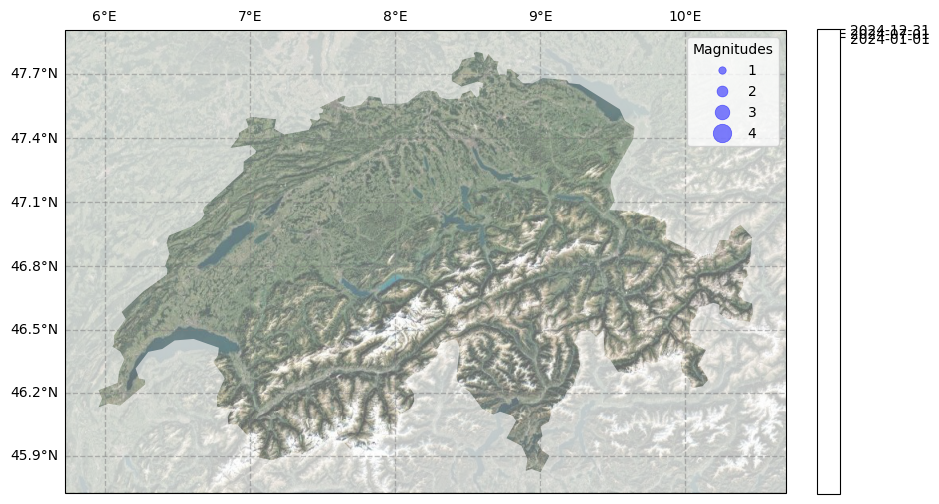

In [76]:
fig = plt.figure(figsize=(10, 10), linewidth=1)

ax = cat.plot_in_space(
    resolution='10m', # resolution of the map, can be '10m', '50m', '110m'
    include_map=True,
    country='Switzerland',
   # color the dots by time (converted to matplotlib date format)
     # background color for the map (default is terrain color)
    dot_labels=[1, 2, 3, 4] # legend labels for the dots
)

# Add colorbar
cbar = plt.colorbar(ax.collections[1], ax=ax, orientation='vertical', fraction=0.03, pad=0.04)

# Add dates to colorbar
date_ticks = ["2024-01-01", "2024-07-01", "2024-12-31"]
date_ticks_num = mdates.date2num(date_ticks)
cbar.set_ticks(date_ticks_num)
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

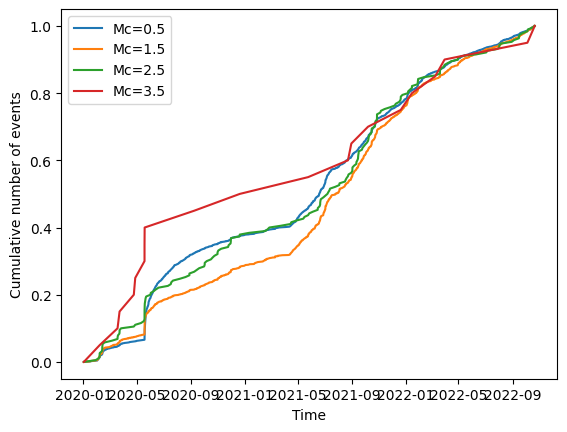

In [29]:
target_magnitudes = np.arange(0.5, 4.0, 1.0) 

ax = cat.plot_cum_count(mcs=target_magnitudes)

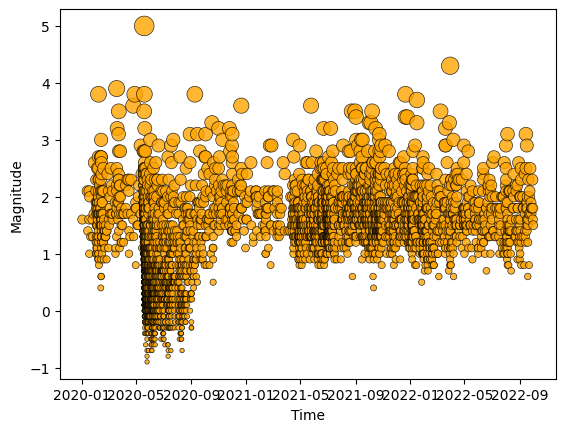

In [18]:
# Basic version without coloring
ax = cat.plot_mags_in_time(color_dots='orange')

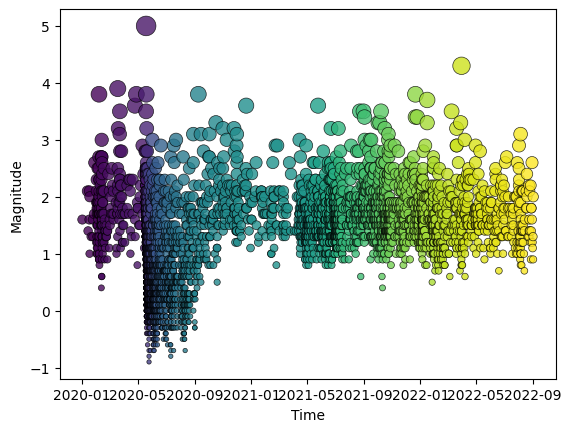

In [7]:
# Coloring events by time
ax = cat.plot_mags_in_time(color_dots=np.arange(len(cat)))

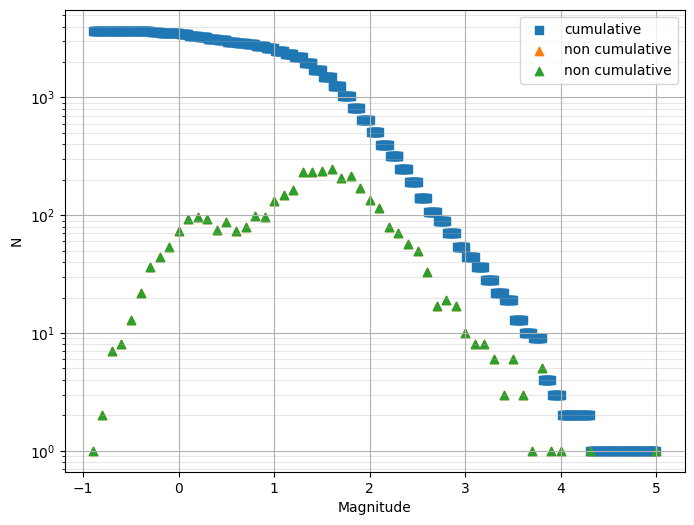

In [39]:
# It is *highly* recommended to bin magnitudes to the catalogue precision before plotting
cat.bin_magnitudes(delta_m=0.01, inplace=True)

# Plot FMD
ax = plt.subplots(figsize=(8, 6))[1]

# cumulative frequency-magnitude distribution
cat.plot_cum_fmd(ax=ax)
# non-cumulative frequency-magnitude distribution with different bin sizes
cat.plot_fmd(fmd_bin=0.1, ax=ax, grid=True)
cat.plot_fmd(fmd_bin=0.01, ax=ax, grid=True)

plt.show()

In [40]:
# Maximum Curvature (MAXC)

# For this method a magnitude discretisation has to be selected by the user with `fmd_bin`. 
# This binning might be different from the binning of the catalog; the optimal value depends on the data. 
mc_maxc, _= cat.estimate_mc_maxc(fmd_bin=0.1)

# By using the a method to estimate the magnitude of completeness, the catalog is automatically updated with the estimated Mc value.
print(f'Estimated Mc using MAXC: {mc_maxc}')
print(f'Mc (currently set catalog attribute): {cat.mc}')

Estimated Mc using MAXC: 1.8
Mc (currently set catalog attribute): 1.8


In [7]:
# Mc by b-value stability (MBS)
mc_stab, _ = cat.estimate_mc_b_stability(stop_when_passed=False)

print(f'Estimated Mc using MBS: {mc_stab}')
# The catalog is automatically updated with the newly estimated Mc value:
print(f'Mc (currently set catalog attribute): {cat.mc}')

/Users/chouyuhin/miniconda3/envs/seismo/lib/python3.10/site-packages/seismostats/analysis/bvalue/base.py:110: UserWarning: No magnitudes in the lowest magnitude bin are present.Check if mc is chosen correctly.
  warnings.warn(
/Users/chouyuhin/miniconda3/envs/seismo/lib/python3.10/site-packages/seismostats/analysis/estimate_mc.py:530: UserWarning: Number of events above tested Mc is less than 30. This might affect the stability test.
  warnings.warn("Number of events above tested Mc is less than 30. "


return_vals: {'best_b_value': np.float64(1.2610631825462109), 'mcs_tested': [-0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51, -0.5, -0.49, -0.48, -0.47, -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4, -0.39, -0.38, -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3, -0.29, -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.

/Users/chouyuhin/miniconda3/envs/seismo/lib/python3.10/site-packages/seismostats/analysis/bvalue/utils.py:65: RuntimeWarning: invalid value encountered in scalar divide
  np.log(10) * b**2 * std_mags / np.sqrt(len_mags - 1)


In [83]:
# K-S distance (KS)
# This method takes longer, especially when the catalog is large. 
# If Mc is known to be larger than a certain value, giving the Mc values that should be tested as an input can make the Mc estimation faster.

mc_kstest, dict = cat.estimate_mc_ks(
   mcs_test=np.arange(-1.0, 3.0, 0.1), # range of Mc values to test with steps of 0.1
    p_value_pass=0.1, # p-value threshold to pass the K-S test 
) 

print(f"First Mc to pass the KS test: {mc_kstest:.2f}")
print(f"Associated beta value: {dict['best_b_value']:.2f}")

# The catalog is automatically updated with the newly estimated Mc value:
print(f'Mc (currently set catalog attribute): {cat.mc:.2f}')

TypeError: unsupported format string passed to NoneType.__format__

TypeError: '>' not supported between instances of 'float' and 'NoneType'

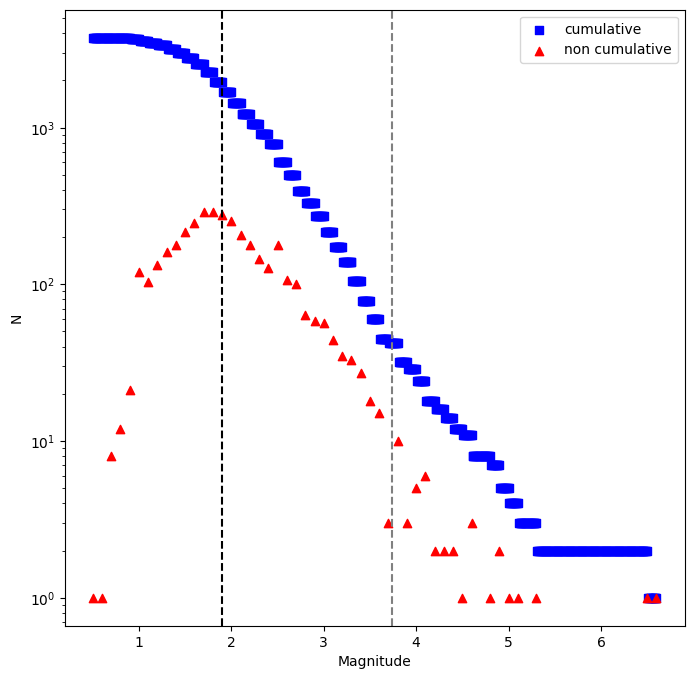

In [ ]:
# Plot the FMD with the estimated Mc value
ax = plt.subplots(figsize=(8, 8))[1]

cat.plot_cum_fmd(ax=ax, color='blue')
cat.plot_fmd(fmd_bin=0.1, ax=ax, color='red')

plt.axvline(mc_maxc, color='black', linestyle='--', label='Maximum curvature $m_c$')
plt.axvline(mc_stab, color='grey', linestyle='--', label='Mc by b-value stability $m_c$')
plt.axvline(mc_kstest, color='lightgrey', linestyle='--', label='KS-test $m_c$')

plt.legend()
plt.show()

### b-value

In [41]:
b_estimator = cat.estimate_b(mc_maxc,delta_m=0.01)

# The calculated b-value is stored in cat.b_value, but the estimator object contains more information:
print('Classical b-value', round(b_estimator.b_value,3))
print('Standard deviation', round(b_estimator.std,2))
print('Number of events used', b_estimator.n)


Classical b-value 1.168
Standard deviation 0.04
Number of events used 1032


TypeError: '>' not supported between instances of 'float' and 'NoneType'

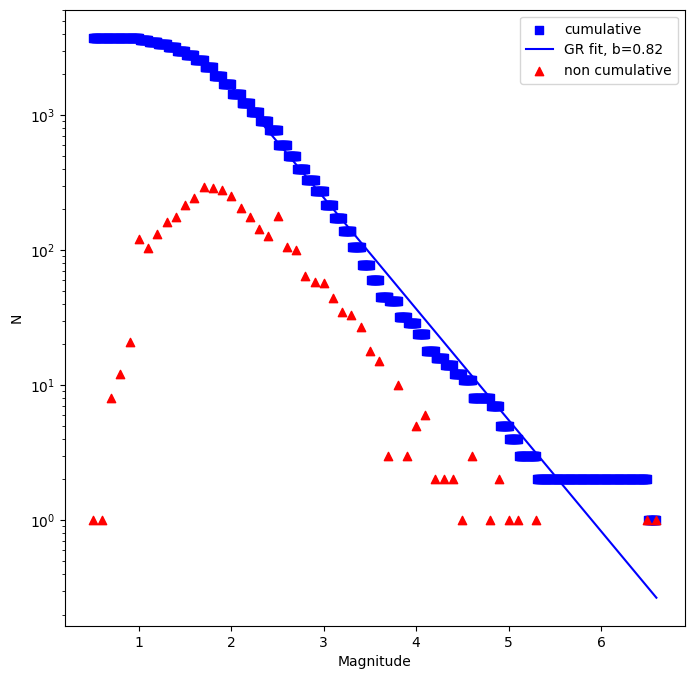

In [ ]:
# FMD plot with b-value
# Once a b-value is estimated and stored in cat.b_value, the FMD can be plotted with a fit:
ax = plt.subplots(figsize=(8, 8))[1]
cat.plot_cum_fmd(color='blue',ax=ax)
cat.plot_fmd(fmd_bin=0.1, ax=ax, color='red')

plt.axvline(mc_kstest, color='lightgrey', linestyle='--', label='KS-test $m_c$')
plt.legend()
plt.show()

In [42]:
from seismostats.analysis import BPositiveBValueEstimator
b_estimator = cat.estimate_b(method =BPositiveBValueEstimator)
print("b-positive:",round(cat.b_value,2))

b-positive: 0.97


<Axes: xlabel='Completeness magnitude $m_c$', ylabel='b-value'>

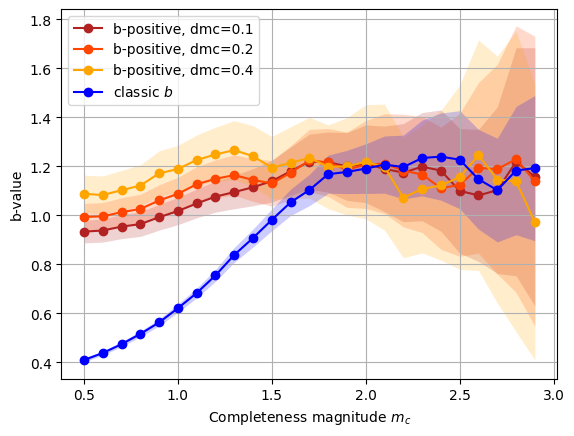

In [43]:
# b-value for different mangitudes of completeness
from seismostats.analysis import ClassicBValueEstimator, BPositiveBValueEstimator

mcs = np.arange(0.5, 3, 0.1)
ax = cat.plot_mc_vs_b(mcs, b_method=BPositiveBValueEstimator, dmc=0.1, color='firebrick', label='b-positive, dmc=0.1')
cat.plot_mc_vs_b(mcs, b_method=BPositiveBValueEstimator, dmc=0.2, ax=ax,  color='orangered', label='b-positive, dmc=0.2')
cat.plot_mc_vs_b(mcs, b_method=BPositiveBValueEstimator, dmc=0.4, ax=ax,  color='orange', label='b-positive, dmc=0.4')

cat.plot_mc_vs_b(mcs, b_method=ClassicBValueEstimator, ax =ax, color='blue', label='classic $b$')

✅ b-value series saved to: stand20_220825_b_positive_series.csv
✅ b-value series saved to: stand20_220825_b_classical_series.csv


Text(0.5, 0, 'Time')

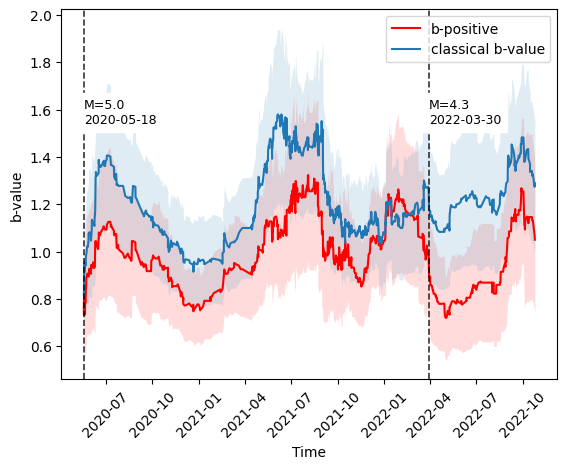

In [44]:
from seismostats.analysis import b_significant_1D
from seismostats.plots import plot_b_series_constant_nm, plot_b_significant_1D

# Parameter setting for the b-value series
mc = mc_maxc # chosen magnitude of completeness
delta_m = cat.delta_m # binning of the magnitudes
times = cat.time 
mags = cat.magnitude
n_m = 100 # number of magnitudes taken per estimate in the running window (above completeness)

# 找出震级最大的前3个事件
top_n = 2
top_indices = np.argsort(mags.values)[-top_n:]  # ✅ 用 .values，确保得到纯 numpy 索引

ax = plot_b_series_constant_nm(mags, delta_m, mc, times, n_m=n_m, x_variable=times, color='red', plot_technique='right', label='b-positive', b_method=BPositiveBValueEstimator,save_path='stand20_220825_b_positive_series.csv')
ax = plot_b_series_constant_nm(mags, delta_m, mc, times, n_m=n_m, x_variable=times, color='#1f77b4', plot_technique='right', label='classical b-value',ax=ax,save_path='stand20_220825_b_classical_series.csv')


# 循环画出前3大地震
for i in reversed(top_indices):
    event_time = times.iloc[i]   # ✅ 按位置取时间
    event_mag = mags.iloc[i]     # ✅ 按位置取震级
    date_str = event_time.strftime('%Y-%m-%d')

    ax.axvline(
        x=event_time,
        color='black',
        linestyle='--',
        linewidth=1.2,
        alpha=0.8
    )

    ax.text(
        event_time,
        ax.get_ylim()[1] * (0.75 + 0.05 * np.random.rand()),  # 高度略随机，防重叠
        f'M={event_mag:.1f}\n{date_str}',
        rotation=0,
        va='center',
        ha='left',
        color='black',
        fontsize=9,
        backgroundcolor='white'
    )
_ = plt.xticks(rotation=45)
ax.set_xlabel('Time')

In [36]:
# 参数设置
mc = mc_maxc  # 选取的完全性震级
delta_m = cat.delta_m  # 震级分箱间隔
times = cat.time
mags = cat.magnitude
n_m = 100  # 每个滑动窗口内的事件数量
# -------- 计算 classical b-value --------
results_classical = b_significant_1D(
    mags, delta_m, mc, times, n_m=n_m
)

# -------- 计算 b-positive b-value --------
results_positive = b_significant_1D(
    mags, delta_m, mc, times, n_m=n_m, b_method=BPositiveBValueEstimator
)

# 将结果保存为 DataFrame
df_b = pd.DataFrame({
    'time': results_classical['x_variable'],
    'b_value_classical': results_classical['b_value'],
    'b_value_positive': results_positive['b_value'],
})

# 保存到 CSV 文件
df_b.to_csv(r'stand_2020_220825_b_value_series.csv', index=False)
print("✅ b-value 序列已保存到 F:\\BHT\\b_value_series.csv")

ValueError: Magnitudes are not binned correctly.

In [ ]:
# Is the b-value calculated with 100 events above completeness constant over time?
p_threshold = 0.05
p, mac, mu_mac, std_mac = b_significant_1D(mags, mc, delta_m, times, n_m, method= BPositiveBValueEstimator)
print('The p-value of a constant b-value hypothesis is {:.2f}'.format(p))

print('This is significantly larger than our threshold of {:.2f}. Therefore, we cannot reject the null-hypothesis'.format(p_threshold))

The p-value of a constant b-value hypothesis is 0.82
This is significantly larger than our threshold of 0.05. Therefore, we cannot reject the null-hypothesis


In [ ]:
# Is the b-value over time constant with other sample sizes?
sample_sizes = np.array([15, 50, 100])

# sort magnitudes along dimension of interest (in this case, time)
srt = np.argsort(times)
mags = mags[srt]
times = times[srt]

ax = plot_b_significant_1D(
    mags, mc, delta_m, times, x_variable=times, color = '#1f77b4', label='classical b-value')

plot_b_significant_1D(
    mags, mc, delta_m,  times, x_variable=times, method=BPositiveBValueEstimator, color = 'red', ax = ax, label='b-positive')

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed